In [16]:
import numpy as np
import pandas as pd
import potential1D as pot
import system1D 
import conveyorBelt as cvb
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colorbar
%matplotlib inline

In [20]:
numsys = 8
steps = 100000

In [21]:
ens=cvb.Ensemble(0.0, numsys, 
                 system=system1D.system1D(
                     potential=pot.pertHarmonicOsc1D(fc=1.0, alpha=10.0, gamma=0.0)
                 ),
                 build=False)
ens.propagate()
ens

0      0.07     0.971
1      0.18     0.277
2      0.43     2.450
3      0.68     2.458
4      0.93     4.682
5      0.82     0.047
6      0.57     0.309
7      0.32     2.862

In [23]:
ens.traj_clear()
systrajs, traj=cvb.calc_traj(steps=steps, ens=ens)

Rejected  41951


In [28]:
traj=pd.DataFrame(traj, columns=['Step', 'CapLam', 'Energy', 'Bias'])
traj.head()

,Step,CapLam,Energy,Bias
0,0.0,6.065316,14.056031,0.0
1,1.0,5.514607,5.565723,0.0
2,2.0,6.214344,6.984344,0.0
3,3.0,6.214344,9.011985,0.0
4,4.0,5.694975,10.762458,0.0


In [6]:
print(systrajs[0])

[[ 1.00000000e+00  7.61900130e-01  3.00000000e+02  0.00000000e+00
   0.00000000e+00  4.07752469e-01  4.07752469e-01  4.04851760e-02
   2.90245904e+00]
 [ 1.00000000e+00 -3.17747213e-01  3.00000000e+02  0.00000000e+00
   0.00000000e+00  1.56248177e-01  1.56248177e-01  2.09514824e-01
   5.04816456e-01]
 [ 1.00000000e+00  8.60790660e-01  3.00000000e+02  0.00000000e+00
   0.00000000e+00  2.07289209e+00  2.07289209e+00  4.59514824e-01
   3.70480280e+00]
 [ 1.00000000e+00  0.00000000e+00  3.00000000e+02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  7.09514824e-01
   0.00000000e+00]
 [ 1.00000000e+00  4.07196639e-01  3.00000000e+02  0.00000000e+00
   0.00000000e+00  8.78386012e-01  8.78386012e-01  9.59514824e-01
   8.29045514e-01]
 [ 1.00000000e+00 -6.74587769e-01  3.00000000e+02  0.00000000e+00
   0.00000000e+00  2.02615947e+00  2.02615947e+00  7.90485176e-01
   2.27534329e+00]
 [ 1.00000000e+00 -4.73845834e-01  3.00000000e+02  0.00000000e+00
   0.00000000e+00  7.1904028

In [9]:
nbins=100
bins=np.zeros(nbins)
dhdlbins=np.zeros(nbins)
for i in range(numsys):
    for j in range(systrajs[:,i,:].shape[0]):
        index=int(np.floor(systrajs[j,i,7]*nbins))
        if index == nbins:
            index=nbins-1
        bins[index]+=1
        dhdlbins[index]+=systrajs[j, i, 8]
dhdlbins/=bins
dhdlbins

array([10.3250814 ,  9.83720972, 10.29044821,  9.40348162,  8.01967048,
        8.34681691,  7.98067526,  6.46976087,  7.02725732,  6.55160317,
        6.01294539,  5.72405738,  6.2692522 ,  4.8316138 ,  4.8086693 ,
        4.80052078,  4.59443791,  4.58147014,  4.45795407,  3.81531219,
        4.36370001,  3.70374575,  3.94788292,  3.55850116,  3.55911986,
        3.517596  ,  3.5621455 ,  3.25452373,  3.23158737,  2.89117277,
        2.73548062,  2.93151558,  2.6174388 ,  2.95784858,  2.8922483 ,
        2.88611046,  2.75364459,  2.73961975,  2.79812276,  2.38514026,
        2.50842595,  2.43656517,  2.4563773 ,  2.1269406 ,  2.03226514,
        2.05411861,  2.11579343,  2.05939799,  2.21974921,  2.09933017,
        2.10201309,  2.07249162,  1.91710918,  1.8795595 ,  2.06975497,
        1.87356841,  1.77549085,  1.74871891,  1.8979159 ,  1.85161445,
        1.76366671,  1.63691702,  1.65929423,  1.62535854,  1.67194248,
        1.63440182,  1.6068637 ,  1.46639899,  1.48117978,  1.51

Integral =  2.9512913049810385


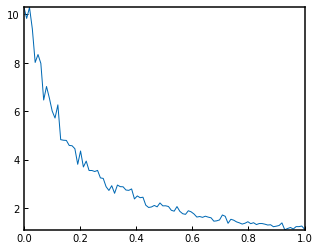

In [10]:
plt.plot(np.linspace(0,1,nbins), dhdlbins)
integral=np.sum(dhdlbins)*1.0/nbins
print('Integral = ', integral)

(0.14, 0.185)

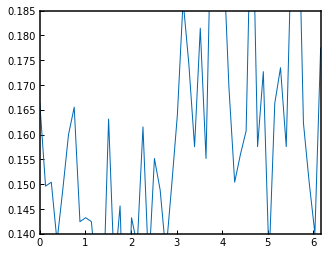

In [13]:
h1=np.histogram(traj.CapLam, bins=50, density=1)
plt.plot(h1[1][:-1], h1[0])
plt.ylim(0.14, 0.185)

Text(0, 0.5, '$\\lambda$')

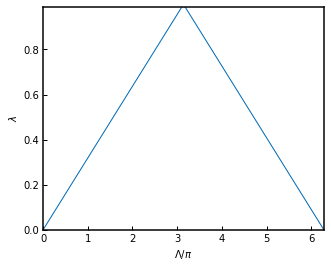

In [14]:
caplam = np.linspace(0, 2*np.pi, 100)
x=[]
for i in caplam:
    x.append(ens.calc_lam(i, 0))
plt.plot(caplam, x)
plt.xlabel('$\Lambda / \pi$')
plt.ylabel('$\lambda$')

In [15]:
#analytical
u=1.66053886e-27
NA=6.0221415e23
hbar=1.054571800e-34*1e12*1e-3*NA  #kJ/mol*ps
R=0.00831446 #kJ/mol/K
mu=0.5  #u
T=300.0  #K
fc1=1  #kJ/nm^2/mol
fc2=11.0 #kJ/nm^2/mol
omega1=np.sqrt(fc1/mu)
omega2=np.sqrt(fc2/mu)
print('Omega', omega1, omega2)
alpha1=hbar*np.sqrt(fc1/mu)/(R*T)
alpha2=hbar*np.sqrt(fc2/mu)/(R*T)
print(alpha1, alpha2)
Z1=np.exp(-alpha1/2.0)/(1-np.exp(-alpha1))
Z2=np.exp(-alpha2/2.0)/(1-np.exp(-alpha2))
F1=-R*T*np.log(Z1)
F2=-R*T*np.log(Z2)
DF=F2-F1
DF2=-R*T*np.log(Z2/Z1)
print(DF, DF2, F1, F2)

Omega 1.4142135623730951 4.69041575982343
0.03600698886161772 0.11942167188449208
2.991927940369414 2.991927940369415 -8.291150088634001 -5.299222148264588
